# Bank Marketing Data Analysis

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import chi2_contingency, pointbiserialr
import statsmodels.api as sm


## 1. Importing the data

<h3>Datasets:</h3>

<ol>
  <li><strong>bank-additional-full.csv</strong>: Contains all examples, ordered by date (from May 2008 to November 2010) including social and economic context attributes.</li>
  <li><strong>bank-additional.csv</strong>: Contains 10% of the examples (4521), randomly selected from <code>bank-additional-full.csv</code>.</li>
    <li><code>bank-full.csv</code> and <code>bank.csv</code>: Similar to the previous datasets but without the social and economic context columns.</li>
</ol>

<p> I will use <code>bank-additional-full.csv</code> for the analysis.</p>

In [2]:
bank_df = pd.read_csv('bank-additional-full.csv')
bank_df.head(5)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [3]:
bank_df.info

<bound method DataFrame.info of       age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0      56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1      57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2      37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3      40;"admin.";"married";"basic.6y";"no";"no";"no...    

The csv file has all values in one column so I need to split it first.

In [4]:
bank_df = bank_df.iloc[:, 0].str.split(';', expand=True)
bank_df.columns = [
    "age", "job", "marital", "education", "default", "housing", "loan", 
    "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"
]
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


The dataset contains the correct amount of 21 columns and around 41k rows.<br><br>
Now I can move on to data preparation.

## 2. Data Preparation and Cleaning

First I'll look at the data types and value counts of each column to determine which columns need to be converted.

In [5]:
bank_df.dtypes

age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

All of the columns are objects, some columns need conversion. <br>
Let's check for nulls.

In [6]:
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No nulls so let's go over the columns one by one starting with 'age'.

In [7]:
bank_df['age'] = bank_df['age'].astype(int)

bank_df['age'].min()

17

In [8]:
bank_df['age'].max()

98

The 'age' column is converted successfully.<br>
The 'job' column is next.

In [9]:
bank_df['job'].value_counts()

job
"admin."           10422
"blue-collar"       9254
"technician"        6743
"services"          3969
"management"        2924
"retired"           1720
"entrepreneur"      1456
"self-employed"     1421
"housemaid"         1060
"unemployed"        1014
"student"            875
"unknown"            330
Name: count, dtype: int64

Let's drop the quotes, capitalize and change "unknown" to <strong> NaN </strong>, also remove the dot from 'Admin'.

In [10]:
bank_df['job'] = bank_df['job'].str.replace('"', '').str.capitalize()
bank_df['job'] = bank_df['job'].str.replace('.', '')

bank_df['job'].replace('Unknown', np.nan, inplace=True)

bank_df['job'].value_counts()

job
Admin            10422
Blue-collar       9254
Technician        6743
Services          3969
Management        2924
Retired           1720
Entrepreneur      1456
Self-employed     1421
Housemaid         1060
Unemployed        1014
Student            875
Name: count, dtype: int64

In [11]:
bank_df['job'].isna().sum()

330

Good, this will provide consistency and simplified data handling.<br>
Next is 'marital'.

In [12]:
bank_df['marital'].value_counts()

marital
"married"     24928
"single"      11568
"divorced"     4612
"unknown"        80
Name: count, dtype: int64

In [13]:
bank_df['marital'] = bank_df['marital'].str.replace('"', '').str.capitalize()

bank_df['marital'].replace('Unknown', np.nan, inplace=True)

bank_df['marital'].value_counts()

marital
Married     24928
Single      11568
Divorced     4612
Name: count, dtype: int64

Next is 'education'.

In [14]:
bank_df['education'].value_counts()

education
"university.degree"      12168
"high.school"             9515
"basic.9y"                6045
"professional.course"     5243
"basic.4y"                4176
"basic.6y"                2292
"unknown"                 1731
"illiterate"                18
Name: count, dtype: int64

In [15]:
bank_df['education'] = bank_df['education'].str.replace('.', ' ')
bank_df['education'] = bank_df['education'].str.replace('"', '').str.capitalize()

bank_df['education'].replace('Unknown', np.nan, inplace=True)

bank_df['education'].value_counts()

education
University degree      12168
High school             9515
Basic 9y                6045
Professional course     5243
Basic 4y                4176
Basic 6y                2292
Illiterate                18
Name: count, dtype: int64

Next we have 'default'.

In [16]:
bank_df['default'].value_counts()

default
"no"         32588
"unknown"     8597
"yes"            3
Name: count, dtype: int64

Only three values of "yes" so unfortunately this column is essentially useless and can be dropped.

In [17]:
bank_df = bank_df.drop('default', axis = 1)

Next is 'housing'.

In [18]:
bank_df['housing'].value_counts()

housing
"yes"        21576
"no"         18622
"unknown"      990
Name: count, dtype: int64

I will encode 'no' as 0, 'yes' as 1 and again replace 'unknown' with <strong> NaN </strong>.

In [19]:
mapping_dict = {
    '"yes"': 1,
    '"no"': 0,
    '"unknown"': np.nan
}

bank_df['housing'] = bank_df['housing'].replace(mapping_dict)

bank_df['housing'].value_counts()

housing
1.0    21576
0.0    18622
Name: count, dtype: int64

Next is 'loan'.

In [20]:
bank_df['loan'].value_counts()

loan
"no"         33950
"yes"         6248
"unknown"      990
Name: count, dtype: int64

Using the same mapping as before.

In [21]:
bank_df['loan'] = bank_df['loan'].replace(mapping_dict)

bank_df['loan'].value_counts()

loan
0.0    33950
1.0     6248
Name: count, dtype: int64

Next is 'contact'.

In [22]:
bank_df['contact'].value_counts()

contact
"cellular"     26144
"telephone"    15044
Name: count, dtype: int64

In [23]:
bank_df['contact'] = bank_df['contact'].str.replace('"', '').str.capitalize()

bank_df['contact'].value_counts()

contact
Cellular     26144
Telephone    15044
Name: count, dtype: int64

Next is 'month'.

In [24]:
bank_df['month'].value_counts()

month
"may"    13769
"jul"     7174
"aug"     6178
"jun"     5318
"nov"     4101
"apr"     2632
"oct"      718
"sep"      570
"mar"      546
"dec"      182
Name: count, dtype: int64

In [25]:
bank_df['month'] = bank_df['month'].str.replace('"', '').str.capitalize()
bank_df['month'].value_counts()

month
May    13769
Jul     7174
Aug     6178
Jun     5318
Nov     4101
Apr     2632
Oct      718
Sep      570
Mar      546
Dec      182
Name: count, dtype: int64

It's strange that this dataset was said to contain data for May 2008 to November 2010 and yet does not have values for January and February, however there is nothing we can do about that and will continue with 'day_of_week' next.

In [26]:
bank_df['day_of_week'].value_counts()

day_of_week
"thu"    8623
"mon"    8514
"wed"    8134
"tue"    8090
"fri"    7827
Name: count, dtype: int64

In [27]:
bank_df['day_of_week'] = bank_df['day_of_week'].str.replace('"', '').str.capitalize()
bank_df['day_of_week'].value_counts()

day_of_week
Thu    8623
Mon    8514
Wed    8134
Tue    8090
Fri    7827
Name: count, dtype: int64

Next we have 'duration'.

In [28]:
bank_df['duration'] = bank_df['duration'].astype(float)

all_integers = bank_df['duration'].apply(lambda x: x.is_integer()).all()
all_integers

True

In [29]:
bank_df['duration'] = bank_df['duration'].astype(int)
bank_df['duration'].max()

4918

The 'campaign' column contains the number of contacts performed with this client and needs to be cast as an integer.

In [30]:
bank_df['campaign'] = bank_df['campaign'].astype(int)

Next is 'pdays'. It's the number of days since previous campaign and also needs to be cast as an integer.

In [31]:
bank_df['pdays'] = bank_df['pdays'].astype(int)
top_pday = bank_df['pdays'][bank_df['pdays'] > 20]
top_pday.value_counts().head(5)

pdays
999    39673
22         3
21         2
25         1
26         1
Name: count, dtype: int64

I also noticed that the values go up to 27 and then there's a lot of rows with the value '999' so I'm assuming that is missing data.

In [32]:
bank_df['pdays'].replace(999, np.nan, inplace=True)
bank_df['pdays'].max()

27.0

The 'previous' column contains the number of contacts prior to the last campaign. Integer again.

In [33]:
bank_df['previous'] = bank_df['previous'].astype(int)

In [34]:
bank_df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

Next up is 'poutcome' which is the outcome of the previous campaign.

In [35]:
bank_df['poutcome'].value_counts()

poutcome
"nonexistent"    35563
"failure"         4252
"success"         1373
Name: count, dtype: int64

I will use a similar mapping as before.

In [36]:
mapping_dict2 = {
    '"success"': 1,
    '"failure"': 0,
    '"nonexistent"': np.nan
}

bank_df['poutcome'] = bank_df['poutcome'].replace(mapping_dict2)
bank_df['poutcome'].value_counts()

poutcome
0.0    4252
1.0    1373
Name: count, dtype: int64

The next column 'emp.var.rate' describes quarterly employment variation rate and should be cast as a float.

In [37]:
bank_df['emp.var.rate'] = bank_df['emp.var.rate'].astype(float)

The 'cons.price.idx' column: consumer price index - monthly indicator - float.

In [38]:
bank_df['cons.price.idx'] = bank_df['cons.price.idx'].astype(float)

The 'cons.conf.idx' column: consumer confidence index - monthly indicator - float.

In [39]:
bank_df['cons.conf.idx'] = bank_df['cons.conf.idx'].astype(float)

The 'euribor3m' column: euribor 3 month rate - daily indicator - float.

In [40]:
bank_df['euribor3m'] = bank_df['euribor3m'].astype(float)

The 'nr.employed' columns: number of employees - quarterly indicator - float.<br><br>
I'm not sure how the number of employees can have fractions but this indicator might mean something else which is unspecified so we'll leave it as a float for now.

In [41]:
bank_df['nr.employed'] = bank_df['nr.employed'].astype(float)

Finally, we have our target value - y. Which indicates whether or not the client subscribed a term deposit.

In [42]:
bank_df['y'].value_counts()

y
"no"     36548
"yes"     4640
Name: count, dtype: int64

In [43]:
target_mapping = {
    '"no"' : 0,
    '"yes"' : 1
}

bank_df['y'] = bank_df['y'].replace(target_mapping)
bank_df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

Let's look at the data types again.

In [44]:
bank_df.dtypes

age                 int32
job                object
marital            object
education          object
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
duration            int32
campaign            int32
pdays             float64
previous            int32
poutcome          float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

That concludes the data cleaning part.

## 3. Data analysis based on socio-demographic influences
To start I will look at the distributions and central tendencies of individual attributes in relation to our target variable 'y'.<br><br>

### 3.1 Age and age groups
Going over each column again, starting with 'age'.<br>
First let's create bins for the age groups, I will use the following categories:
1. 20-29
2. 30-39
3. 40-49
4. 50-59
5. Over 60

In [45]:
bank_df[bank_df['age'] < 20].shape

(75, 20)

As you can see there's only 75 entries for people below 20 which amounts to less than 0.2% so I will not be taking those into account here.

In [46]:
bins = [20, 30, 40, 50, 60, float('inf')]
labels = ['20-29', '30-39', '40-49', '50-59', 'Over 60']

bank_df['age_group'] = pd.cut(bank_df['age'], bins=bins, labels=labels, right=False)

age_percentages = bank_df['age_group'].value_counts(normalize=True) * 100
age_percentages.round(2)

age_group
30-39      41.20
40-49      25.60
50-59      16.69
20-29      13.61
Over 60     2.90
Name: proportion, dtype: float64

People of ages 30-39 amount to 41.2% of the dataset.<br>
People of ages 30-49 amount to 66.8% of the dataset.<br>
The remaining is almost evenly split between people in their 20s or 50s with slightly more people in their 50s.<br>
People over 60 amount to less than 3% of the dataset.<br><br>
I will now plot the distribution of the age groups with the proportion of our target variable 'y'.

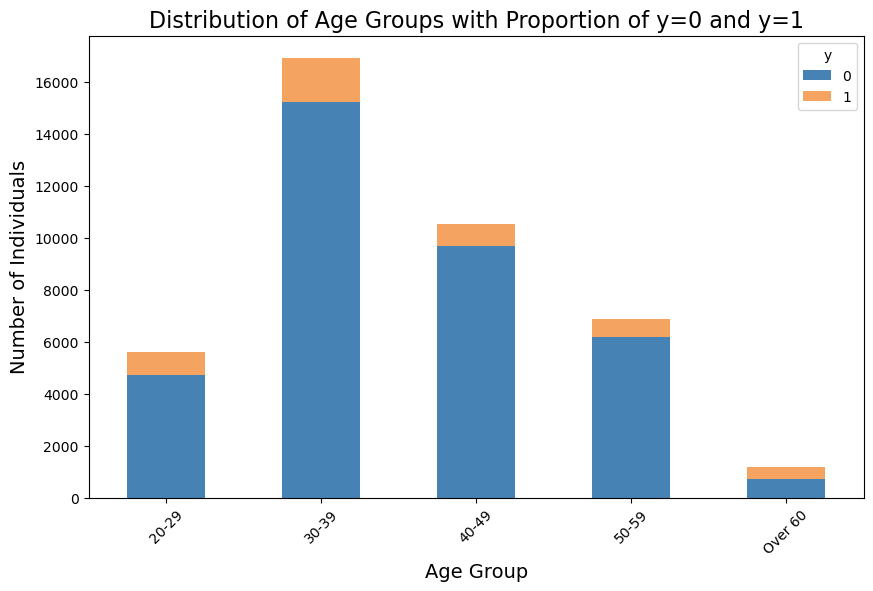

In [47]:
counts = bank_df.groupby(['age_group', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

counts.plot(kind='bar', stacked=True, color=['steelblue', 'sandybrown'], ax=plt.gca())

plt.title('Distribution of Age Groups with Proportion of y=0 and y=1', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.legend(title='y', loc='upper right')
plt.xticks(rotation=45)

plt.show()

In [48]:
(proportions.sort_values(by=0)*100).round(2)[1]

age_group
Over 60    39.56
20-29      15.87
50-59      10.16
30-39      10.13
40-49       7.92
Name: 1, dtype: float64

The biggest proportion of target value y=1 is for the age group of people over 60 by far, however the age group amounts to less than 3% of the dataset so there is a considerable risk for bias here.<br><br>
The age group of 20-29 seems to have a moderately larger proportion for our target value but it's also less represented in the dataset.<br><br>
Let's do a chi-squared test to see if there is a statistically significant assosiation.

In [49]:
contingency_table = pd.crosstab(bank_df['age_group'], bank_df['y'])
contingency_table.sort_index()

y,0,1
age_group,,
20-29,4706,888
30-39,15223,1715
40-49,9692,834
50-59,6165,697
Over 60,721,472


In [50]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
chi2

1228.429928647577

A Chi-Square statistic of 1228.43 is very large, indicating that there is a significant difference between the observed and expected frequencies in our contingency table.

In [51]:
p

1.093596678119617e-264

A p-value of 1.0936e-264 is astronomically small, much smaller than the common significance level of 0.05.

Based on the chi-squared test it is highly unlikely that these results are by chance and it shows strong significance of the age group towards the outcome of the target variable. <br><br>
Another way to look at the age attribute would be to see the spread of data among the two groups of target variable y=0 and y=1 based on age. First let's do some box plots for this purpose.

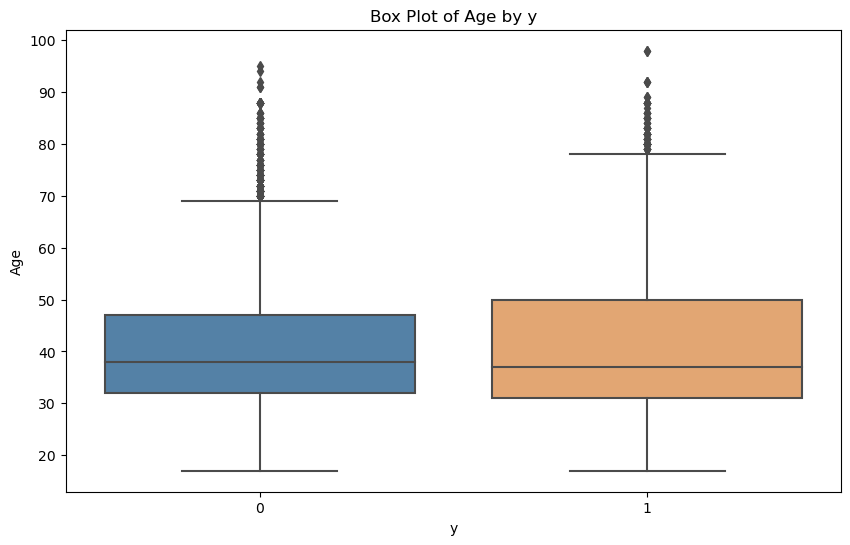

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=bank_df, palette = ['steelblue', 'sandybrown'])
plt.title('Box Plot of Age by y')
plt.xlabel('y')
plt.ylabel('Age')
plt.show()

Looking at the box plots there doesn't seem to be a strong relationship between the spread of age for the two groups. But there is a slight difference in that people with bank subscriptions have more datapoints on the higher end of the age attribute.

Let's look at the Point-Biserial correlation which measures the relationship between a continuous variable like age and our binary target variable.

In [53]:
correlation, p_value = pointbiserialr(bank_df['age'], bank_df['y'])

correlation

0.030398803040003714

Based on the box plots and correlation there seems to be no significant relationship between the target variable and age, but based on our chi-squared statistic it seems that there is a difference between certain age groups, the most attractive ones for marketing campaigns seem to be:
1. People over 60
2. People aged 20-29
3. People aged 30-39 and 50-59

People in their 40s generally have less deposits in the bank and we would need more information about people up to 20 years.

### 3.2 Occupations

First let's plot the distribution of employment categories.

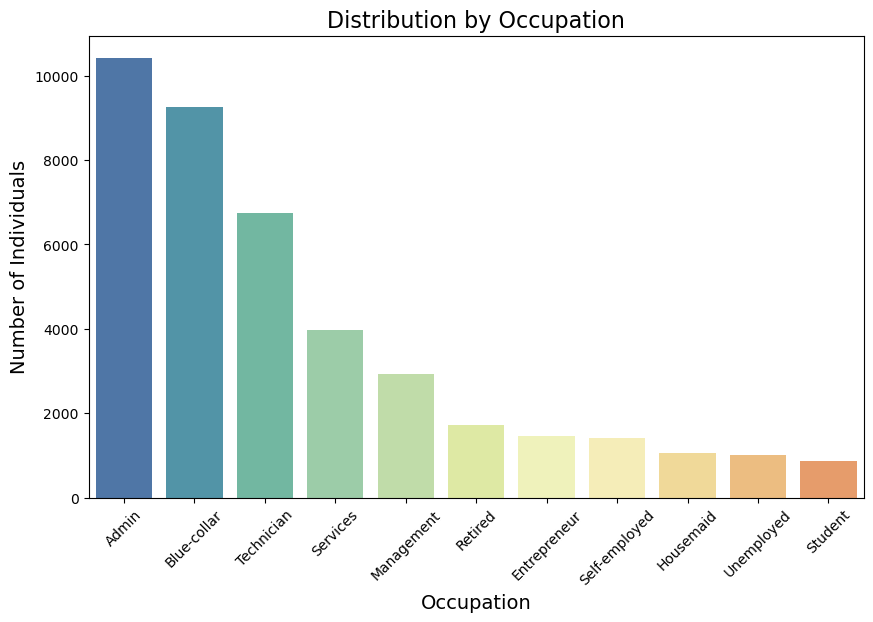

In [54]:
job_counts = bank_df['job'].value_counts()

colors = sns.color_palette("Spectral_r", len(job_counts)+3)

plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette=colors)
plt.title('Distribution by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(rotation=45)
plt.show()

So as we can see the top five occupations in the dataset are:
1. Administrators (Over 10k)
2. Blue-collar workers (Around 9k)
3. Technicians (Around 7k)
4. Service workers (Around 4k)
5. Managers (Around 3k)

And the bottom five based on number of individuals:
1. Students
2. Unemployed
3. Housemaids
4. Self-employed
5. Entrepreneurs

All somewhere in the range of 1000-1800 entries.

Now let's look at the proportion of our target variable for each category.

In [55]:
counts = bank_df.groupby(['job', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

sorted_proportions = (proportions.sort_values(by=0)*100).round(2)[1]
sorted_proportions

job
Student          31.43
Retired          25.23
Unemployed       14.20
Admin            12.97
Management       11.22
Technician       10.83
Self-employed    10.49
Housemaid        10.00
Entrepreneur      8.52
Services          8.14
Blue-collar       6.89
Name: 1, dtype: float64

Let's plot these to better visualize the groups and their proportion of our target variable.

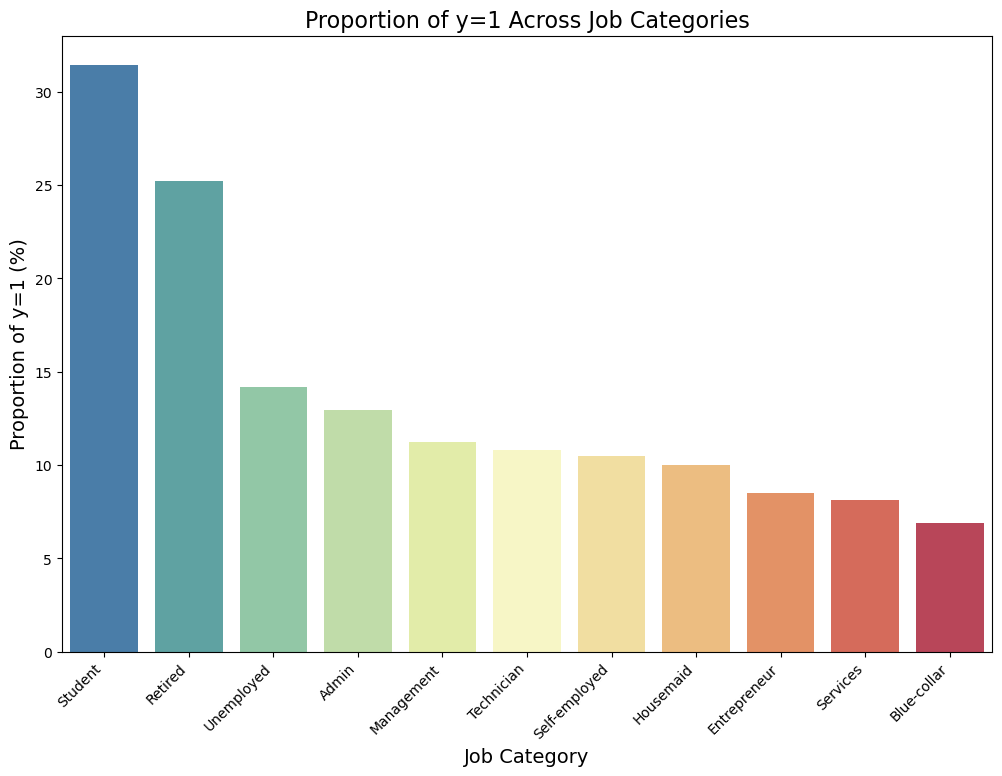

In [56]:
colors = sns.color_palette("Spectral_r", len(counts))

plt.figure(figsize = (12, 8))
sns.barplot(x=sorted_proportions.index, y=sorted_proportions, palette=colors)
plt.title('Proportion of y=1 Across Job Categories', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Proportion of y=1 (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

So the top three groups of occupation based on our target variable are actually:
1. Students
2. Retired
3. Unemployed

And the three groups with the lowest proportion of our target variable are:
1. Blue-collar
2. Service 
3. Entrepreneurs

However the students and unemployed are one of the smaller groups in the dataset so again we might be seeing some bias. Let's do a chi-squared test again to look at the significance of the difference between these groups.

In [57]:
contingency_table = pd.crosstab(bank_df['job'], bank_df['y'])
contingency_table.sort_index()

y,0,1
job,,
Admin,9070,1352
Blue-collar,8616,638
Entrepreneur,1332,124
Housemaid,954,106
Management,2596,328
Retired,1286,434
Self-employed,1272,149
Services,3646,323
Student,600,275


In [58]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
chi2

961.2094297885744

In [59]:
p

4.2324056799938595e-200

Again we have a large chi-squared statistic and a miniscule p-value which indicates a strong statistical significance of the difference between our target value proportion for each of the job groups.

So we have to conclude that based on our dataset the top three job categories with the most deposits are Students, Retired and Unemployed people based on proportion.

While if you look at the raw numbers the occupations with the most subscriptions are:
1. Admin
2. Technician
3. Blue-collar workers

### 3.3 Marital status

Again let's start with the distribution.

In [60]:
marital_status = bank_df['marital'].value_counts(normalize=True)*100
marital_status.round(2)

marital
Married     60.64
Single      28.14
Divorced    11.22
Name: proportion, dtype: float64

So as we can see most of the individuals are married, a smaller part is single and about 11.2% are divorced.

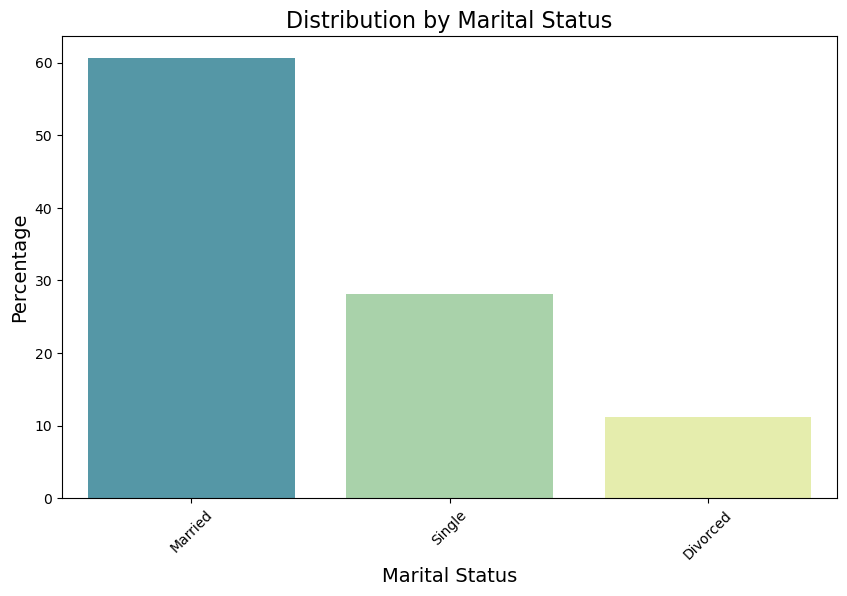

In [61]:
colors = sns.color_palette("Spectral_r", len(marital_status)+3)

plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status.index, y=marital_status.values, palette=colors)
plt.title('Distribution by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Now we'll take a look at the proportions of y.

In [62]:
counts = bank_df.groupby(['marital', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

sorted_proportions = (proportions.sort_values(by=0)*100).round(2)[1]
sorted_proportions

marital
Single      14.00
Divorced    10.32
Married     10.16
Name: 1, dtype: float64

Single people have a more than 35% larger proportion of deposits based on this data.

In [63]:
contingency_table = pd.crosstab(bank_df['marital'], bank_df['y'])
contingency_table.sort_values(by=1, ascending = False)

y,0,1
marital,,
Married,22396,2532
Single,9948,1620
Divorced,4136,476


In [64]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
chi2

121.60529977368248

In [65]:
p

3.924141589479533e-27

Our chi-squared test shows that there is a high statistical significance in the difference of the marital status and our outcome variable.

Based on our dataset we can conclude that single people are more attractive for our bank's marketing campaigns.

### 3.4 Education

Again we start with the distribution and then move on to the outcomes.

In [66]:
education = bank_df['education'].value_counts(normalize=True)*100
education.round(2)

education
University degree      30.84
High school            24.11
Basic 9y               15.32
Professional course    13.29
Basic 4y               10.58
Basic 6y                5.81
Illiterate              0.05
Name: proportion, dtype: float64

So a small fraction of people in the dataset are illiterate and I will not be taking them into account.

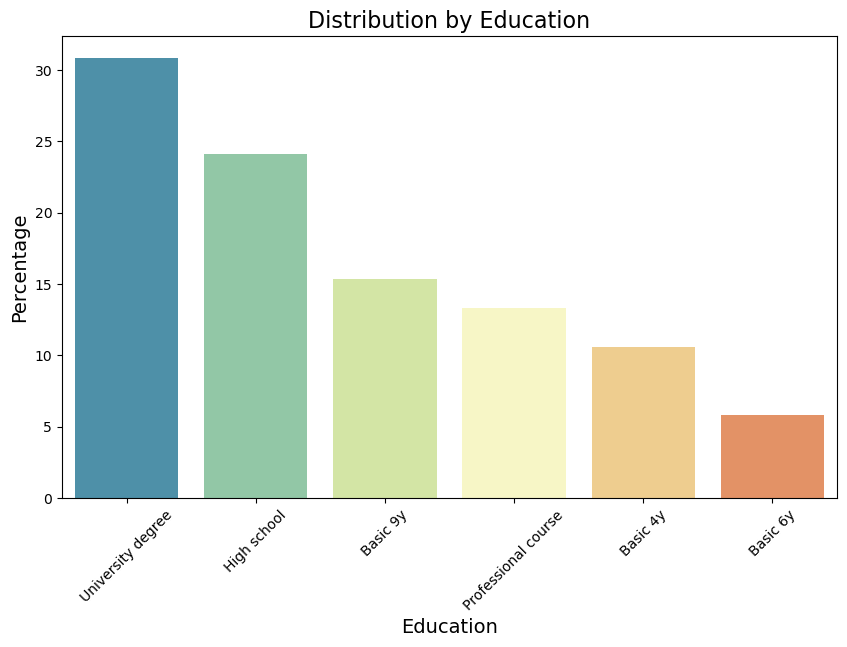

In [67]:
education = education.drop('Illiterate')

colors = sns.color_palette("Spectral_r", len(education)+1)

plt.figure(figsize=(10, 6))
sns.barplot(x=education.index, y=education.values, palette=colors)
plt.title('Distribution by Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Almost a third of the entries (30.8%) are people with University degrees.<br><br>
The second most popular is finishing high school at around 24%. <br><br>
We have the least amount of entries for those who finished 6th grade at around 6%. <br><br>
And a whopping 10.6% of people who finished just 4th grade.

<br>
Now let's do the proportions of y.

In [68]:
counts = bank_df.groupby(['education', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)
proportions = proportions.drop('Illiterate', axis=0)

sorted_proportions = (proportions.sort_values(by=0)*100).round(2)[1]
sorted_proportions

education
University degree      13.72
Professional course    11.35
High school            10.84
Basic 4y               10.25
Basic 6y                8.20
Basic 9y                7.82
Name: 1, dtype: float64

The top three education groups with the highest amount of deposits proportionally are:
1. People with University degrees
2. People with professional certificates
3. People who at least finished high school

While the three lower groups are the ones with 9, 6 or 4 years of basic schooling.

In [69]:
education_count = bank_df['education'].value_counts()
education_count

education
University degree      12168
High school             9515
Basic 9y                6045
Professional course     5243
Basic 4y                4176
Basic 6y                2292
Illiterate                18
Name: count, dtype: int64

If we look at the raw numbers then people with professional certificates fall two places down below Basic 9 year education.

In [70]:
contingency_table = pd.crosstab(bank_df['education'], bank_df['y'])
contingency_table = contingency_table.drop('Illiterate',axis=0)
contingency_table.sort_values(by=1, ascending = False)

y,0,1
education,,
University degree,10498,1670
High school,8484,1031
Professional course,4648,595
Basic 9y,5572,473
Basic 4y,3748,428
Basic 6y,2104,188


In [71]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
chi2

173.95655949737198

In [72]:
p

1.0441454997174105e-35

The test shows significant differences in the amount of bank deposits made by people based on education and a higher education level is correlated with a larger chance of a successful outcome for the bank.

### 3.5 Housing

In [73]:
housing = bank_df['housing'].value_counts(normalize=True)*100
housing.round(2)

housing
1.0    53.67
0.0    46.33
Name: proportion, dtype: float64

In [74]:
counts = bank_df.groupby(['housing', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

sorted_proportions = (proportions.sort_values(by=0)*100).round(2)[1]
sorted_proportions

housing
1.0    11.62
0.0    10.88
Name: 1, dtype: float64

The difference in proportion of each group based on both datapoints and on proportion of target outcomes is not huge but based on our dataset there seems to be almost a 7% increase in proportion of of bank deposits for people who have their own housing.

In [75]:
contingency_table = pd.crosstab(bank_df['housing'], bank_df['y'])
contingency_table.sort_values(by=1, ascending = False)

y,0,1
housing,,
1.0,19069,2507
0.0,16596,2026


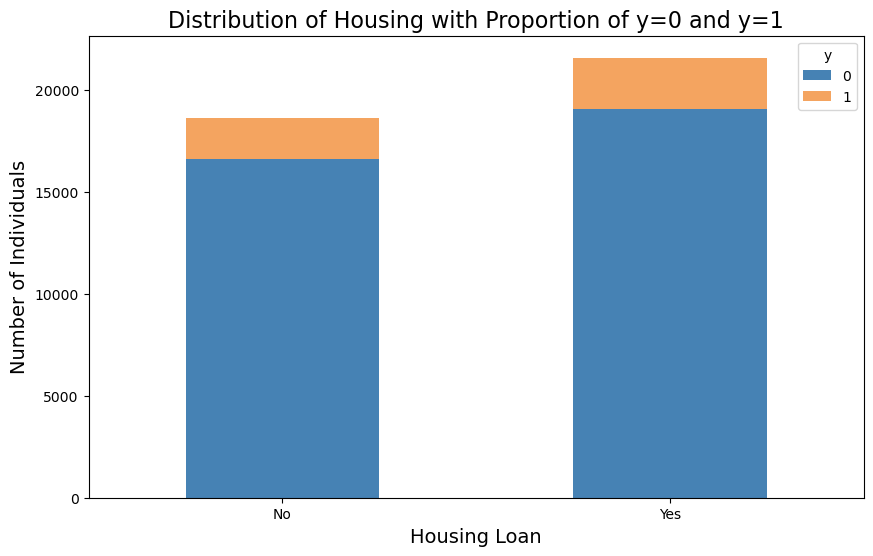

In [76]:
counts = bank_df.groupby(['housing', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

counts.plot(kind='bar', stacked=True, color=['steelblue', 'sandybrown'], ax=plt.gca())

plt.title('Distribution of Housing with Proportion of y=0 and y=1', fontsize=16)
plt.xlabel('Housing Loan', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.legend(title='y', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation = 0)

plt.show()

In [77]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
chi2

5.39379004452624

In [78]:
p

0.02020853196455713

Although the results are less significant compared to other attributes, they are still worthy of attention and housing can be used for predicting the target outcome, with an almost 7% increase for people who have housing loans based on the dataset.

### 3.6 Loan

In [79]:
housing = bank_df['loan'].value_counts(normalize=True)*100
housing.round(2)

loan
0.0    84.46
1.0    15.54
Name: proportion, dtype: float64

15.5% of the individuals in the dataset have personal loans.

In [80]:
counts = bank_df.groupby(['loan', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

sorted_proportions = (proportions.sort_values(by=0)*100).round(2)[1]
sorted_proportions

loan
0.0    11.34
1.0    10.93
Name: 1, dtype: float64

The difference of proportion of target value for the two groups is even smaller this time at around 3.75%.

In [81]:
contingency_table = pd.crosstab(bank_df['loan'], bank_df['y'])
contingency_table

y,0,1
loan,,
0.0,30100,3850
1.0,5565,683


In [82]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
chi2

0.8406393365518647

In [83]:
p

0.35921398426348206

The difference between people with and without personal loans and the proportion of the groups' target values is not statistically significant.

### 3.7 Correlations
Let's start by plotting a correlation matrix for the columns of interest.

I will need to one-hot encode the categorical attributes first.

In [84]:
demographics_columns = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'y']

df_encoded = pd.get_dummies(bank_df[demographics_columns],\
                            columns=['job', 'marital', 'education'], drop_first=True)
df_encoded.head(5)

,age,housing,loan,y,job_Blue-collar,job_Entrepreneur,job_Housemaid,job_Management,job_Retired,job_Self-employed,...,job_Technician,job_Unemployed,marital_Married,marital_Single,education_Basic 6y,education_Basic 9y,education_High school,education_Illiterate,education_Professional course,education_University degree
0,56,0.0,0.0,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,57,0.0,0.0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,37,1.0,0.0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,40,0.0,0.0,0,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,56,0.0,1.0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


The encoded DataFrame appears to be correctly structured for multivariate analysis.

Let's look at the correlation matrix.

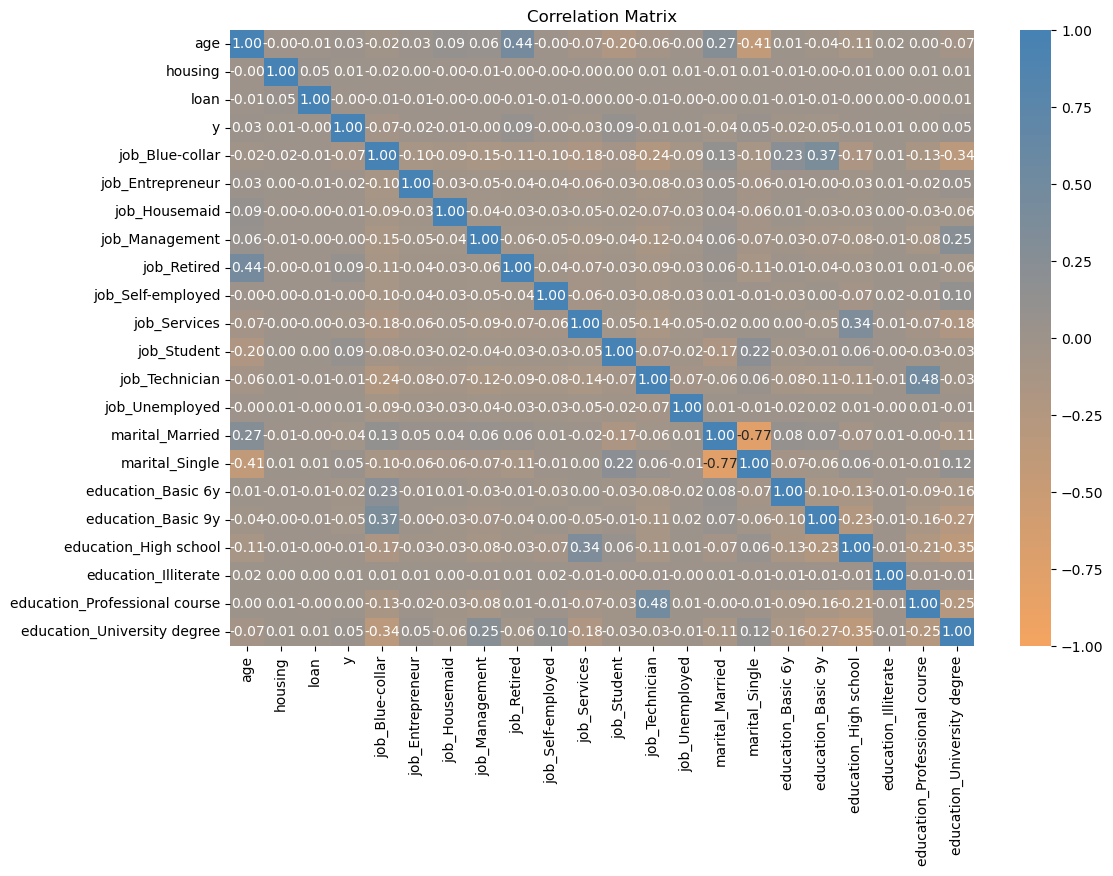

In [85]:
colors = ["#F4A460", "#4682B4"]

custom_cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=100)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=custom_cmap, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals that the only strong correlation observed is a negative correlation between being single and married, which is expected.

The absence of strong correlations among the other variables suggests that there isn't significant multicollinearity in the dataset. This means that the variables are relatively independent of each other, and it is appropriate to analyze them individually.

Additionally, when examining the correlation between these variables and the target variable, none of the variables show a strong correlation with the target. This indicates that no single variable in this set is a strong predictor of the outcome on it's own.

### 3.8 Summary of socio-demographic factors

There is a difference between certain <strong>age groups</strong>, the most attractive ones for marketing campaigns seem to be:

1. People over 60
2. People aged 20-29
3. People aged 30-39 and 50-59

People in their 40s generally have less deposits in the bank and we would need more information about people up to 20 years.

The top three groups of <strong>occupation</strong> based on our target variable are:

1. Students
2. Retired
3. Unemployed

And the three groups with the lowest proportion of our target variable are:

1. Blue-collar
2. Service
3. Entrepreneurs

<strong>Single people </strong>have a more than 35% larger proportion of deposits in our dataset and the results are statistically significant.
<br>
The top three <strong>education </strong>groups with the highest amount of deposits proportionally are:

1. People with University degrees
2. People with professional certificates
3. People who at least finished high school

While the three lower groups are the ones with 9, 6 or 4 years of basic schooling.
<br>
Although the results are less significant compared to other attributes, having a <strong>housing loan </strong>relates to an almost 7% increase in the frequency of our target variable.

## 4. Campaign data analysis

Let's start by looking at some summary statistics for the related variables.

In [86]:
bank_df[['duration', 'campaign', 'pdays', 'previous']].describe()

,duration,campaign,pdays,previous
count,41188.000000,41188.000000,1515.000000,41188.000000
mean,258.285010,2.567593,6.014521,0.172963
std,259.279249,2.770014,3.824906,0.494901
min,0.000000,1.000000,0.000000,0.000000
25%,102.000000,1.000000,3.000000,0.000000
50%,180.000000,2.000000,6.000000,0.000000
75%,319.000000,3.000000,7.000000,0.000000
max,4918.000000,56.000000,27.000000,7.000000


The mean contact duration is about 4 minutes and 20 seconds, but can go up to about 82 minutes. 

The number of contacts ranges from 1 to 56 and is about 2.8 on average.

The number of days that passed by after the client was last contacted from a previous campaign ranges from 0 meaning that they weren't contacted before up to 27 days. On average it's around 6 days.

The number of contacts performed before this campaign and for this client ranges from 0 to 7 and is just 0.17 on average.

### 4.1 Contact

In [87]:
contact = bank_df['contact'].value_counts(normalize=True)*100
contact.round(2)

contact
Cellular     63.47
Telephone    36.53
Name: proportion, dtype: float64

About 63.5% of the last contacts were made with cellular phone calls.

In [88]:
counts = bank_df.groupby(['contact', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

proportions

y,0,1
contact,,
Cellular,0.852624,0.147376
Telephone,0.947687,0.052313


We can see a huge difference in the numbers for this attribute, cellular contact type has nearly three times the proportion of successful outcomes or an increase of 182.7%.

### 4.2 Month

In [89]:
bank_df['month'].value_counts()

month
May    13769
Jul     7174
Aug     6178
Jun     5318
Nov     4101
Apr     2632
Oct      718
Sep      570
Mar      546
Dec      182
Name: count, dtype: int64

Most of the data comes from the months April to August and then has another spike on November while there is no data for January and February.

In [90]:
counts = bank_df.groupby(['month', 'y']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)

proportions.sort_values(by=0)

y,0,1
month,,
Mar,0.494505,0.505495
Dec,0.510989,0.489011
Sep,0.550877,0.449123
Oct,0.561281,0.438719
Apr,0.795213,0.204787
Aug,0.893979,0.106021
Jun,0.894885,0.105115
Nov,0.898561,0.101439
Jul,0.909534,0.090466


As we can see the top four months are the ones with the least amount of datapoints and could potentially introduce bias. Let's focus on the six months that are the most representative.

In [91]:
proportions = proportions.drop(['Dec', 'Mar', 'Sep', 'Oct'])
proportions = proportions.sort_values(by=0)

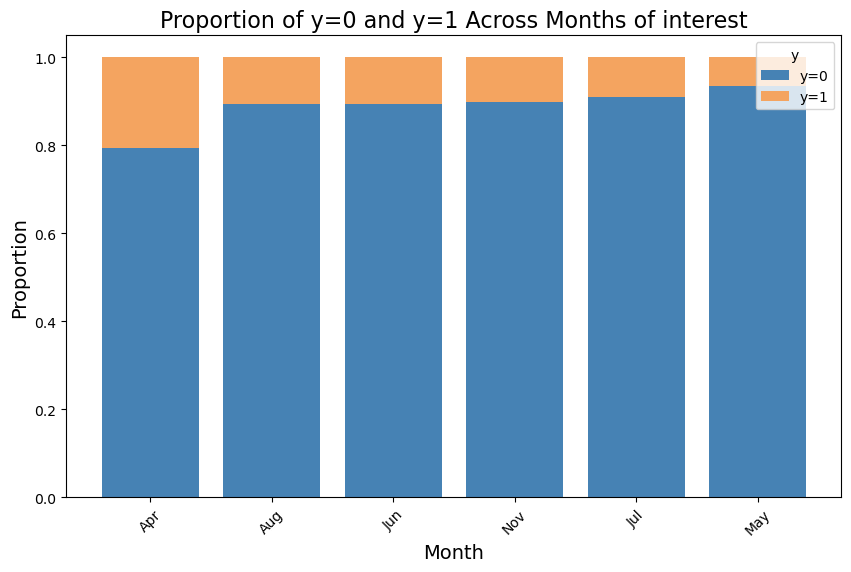

In [92]:
plt.figure(figsize=(10, 6))

plt.bar(proportions.index, proportions[0], label='y=0', color='steelblue')

plt.bar(proportions.index, proportions[1], bottom=proportions[0], label='y=1', color='sandybrown')

plt.title('Proportion of y=0 and y=1 Across Months of interest', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.legend(title='y', loc='upper right')
plt.xticks(rotation=45)

plt.show()

Now we see that four of the six months are similar in proportion of our target value except for April which has almost double the successful outcome and May which about a third less.

In [93]:
months_of_interest = ['Apr', 'Aug', 'Jul', 'Jun', 'May', 'Nov']
contingency_table = pd.crosstab(bank_df['month'][bank_df['month'].isin(months_of_interest)], bank_df['y'])
contingency_table.sort_values(by=1, ascending=False)

y,0,1
month,,
May,12883,886
Aug,5523,655
Jul,6525,649
Jun,4759,559
Apr,2093,539
Nov,3685,416


In [94]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
chi2

540.3827099615903

In [95]:
p

1.5263890694909228e-114

As one might expect the results are very statistically significant in this case. April is a much better month for campaigns and May is much worse based on our data, although this would need further investigation as this is the month of last contact only.

### 4.3 Day of week

In [96]:
bank_df['day_of_week'].value_counts()

day_of_week
Thu    8623
Mon    8514
Wed    8134
Tue    8090
Fri    7827
Name: count, dtype: int64

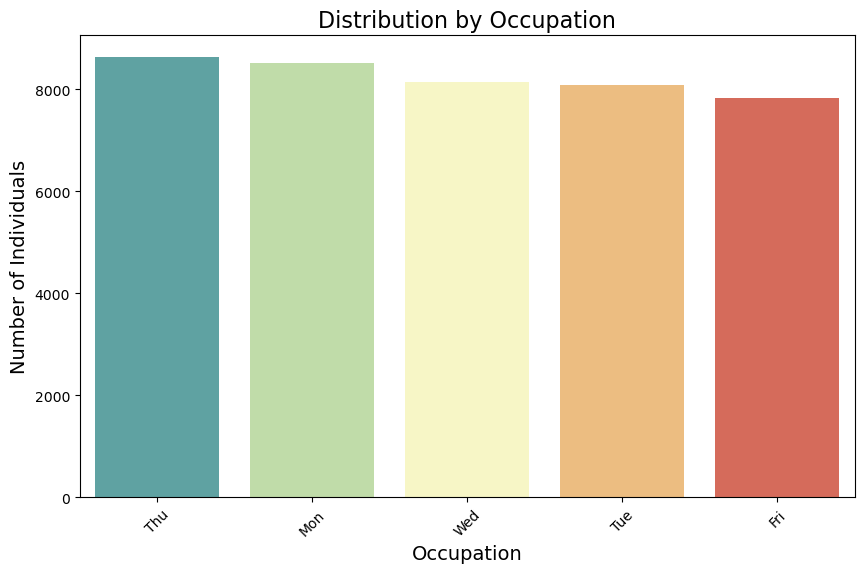

In [99]:
dow_counts = bank_df['day_of_week'].value_counts().sort_values(ascending=False)

colors = sns.color_palette("Spectral_r", len(dow_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=dow_counts.index, y=dow_counts.values, palette=colors)
plt.title('Distribution by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(rotation=45)
plt.show()